# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data_dict={}
#Dictionary to store values with each coutry keyimport numpy as np
df=pd.read_csv("all_data.csv")
df.rename(columns={
    "Life expectancy at birth (years)":"Life_Expectancy"
},inplace=True)
print(df.info())
# NO null data
# 96 entries
# coutry object --> Categorcial Nominal Variable
# Year int64 --> Quantitative Discrete Variable
# Life_Expectancy float64 --> Quantitative Continuous Variable
# GDP float64 --> Quantitative Continuous Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [ ]:
#unique value in Coutry
print(df.Country.unique())
#unique value in Year 2000~2015 16years observation
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [ ]:
#create dictionary with coutry key 
for item in df.Country.unique():
    data=df[df.Country==item]
    data_dict[item]=data

## Let's see summary of each coutry data

Chile

In [ ]:
print(data_dict["Chile"].drop('Year',axis=1).describe())

       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         78.943750  1.697888e+11
std           1.058911  7.687884e+10
min          77.300000  6.973681e+10
25%          77.975000  9.387303e+10
50%          79.000000  1.729975e+11
75%          79.825000  2.449515e+11
max          80.500000  2.783840e+11


China

In [ ]:
print(data_dict["China"].drop('Year',axis=1).describe())

       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         74.262500  4.957714e+12
std           1.318016  3.501096e+12
min          71.700000  1.211350e+12
25%          73.400000  1.881585e+12
50%          74.450000  4.075195e+12
75%          75.250000  7.819550e+12
max          76.100000  1.106470e+13


Germany

In [ ]:
print(data_dict["Germany"].drop('Year',axis=1).describe())

       Life_Expectancy           GDP
count         16.00000  1.600000e+01
mean          79.65625  3.094776e+12
std            0.97500  6.674862e+11
min           78.00000  1.949950e+12
25%           78.95000  2.740870e+12
50%           79.85000  3.396350e+12
75%           80.52500  3.596078e+12
max           81.00000  3.890610e+12


Mexico

In [ ]:
print(data_dict["Mexico"].drop('Year',axis=1).describe())

       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         75.718750  9.766506e+11
std           0.620987  2.095716e+11
min          74.800000  6.836480e+11
25%          75.225000  7.630910e+11
50%          75.650000  1.004376e+12
75%          76.150000  1.156992e+12
max          76.700000  1.298460e+12


United States of America

In [ ]:
print(data_dict["United States of America"].drop('Year',axis=1).describe())

       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         78.062500  1.407500e+13
std           0.832566  2.432694e+12
min          76.800000  1.030000e+13
25%          77.425000  1.210000e+13
50%          78.150000  1.445000e+13
75%          78.725000  1.567500e+13
max          79.300000  1.810000e+13


Zimbabwe

In [ ]:
print(data_dict["Zimbabwe"].drop('Year',axis=1).describe())

       Life_Expectancy           GDP
count        16.000000  1.600000e+01
mean         50.093750  9.062580e+09
std           5.940311  4.298310e+09
min          44.300000  4.415703e+09
25%          45.175000  5.748309e+09
50%          47.400000  6.733671e+09
75%          55.325000  1.263446e+10
max          60.700000  1.630467e+10


Class with GDP and life expectancy datasets


In [ ]:
class Coutry_GDP_LifeExpectancy:
    data_dict={}
    df=pd.read_csv("all_data.csv")
    df.rename(columns={
    "Life expectancy at birth (years)":"Life_Expectancy"},inplace=True)
    def __init__(self):
        for item in df.Country.unique():
            data=df[df.Country==item]
            data_dict[item]=data
        self.data_dict=data_dict
        self.df=df
    
    def graph_for_all(self, category):
        sns.lineplot(data=self.df, x="Year",y=category,hue="Country")
        plt.show()
        plt.clf()
        sns.barplot(x=category,y='Country',data=self.mean_for_each())
        plt.show()
        plt.clf()

    def graph_for_each(self, category):
        graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

        graph = (graph.map(sns.lineplot,"Year", category)
                .add_legend()
                .set_axis_labels("Year", category))

        graph;


    def mean_for_each(self):
        mean_for_each=self.df.drop('Year',axis=1).groupby('Country').mean().reset_index()
        return mean_for_each
        
    def distribution_chart(self, category):
        sns.displot(data=df, x=category)
        plt.xlabel(category)
        plt.show()
        plt.clf()
    


Comparison of means for GDP and life expectancy grouped by coutry

In [ ]:
data=Coutry_GDP_LifeExpectancy()
data.mean_for_each()

,Country,Life_Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Line Plot to see GDP increase of each year grouped by coutry

Bar Plot to see better comparison of means of GDP 

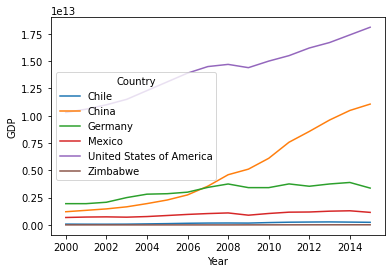

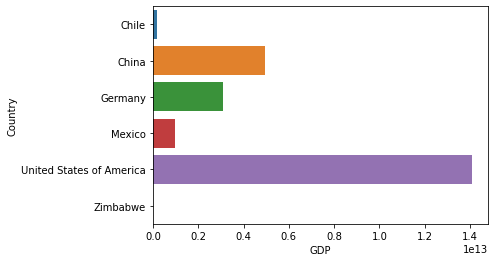

<Figure size 432x288 with 0 Axes>

In [ ]:
data.graph_for_all("GDP")
# From line plot
# seemingly, US and China have substantial gains from 2000--2015
# China went up from 0.25 trilion dollars to 1 trillion dollars from 2008 to 2015
# Other countries do not have increases.
# From Bar Plot
# We cannot see any on Zimbabwe
# We also barely see teh bar on Mexico
# US has a huge GDP compared to the rest
# Other Coutries seem to be relatively close in figures

Let's see how individual country has different growth on GDP

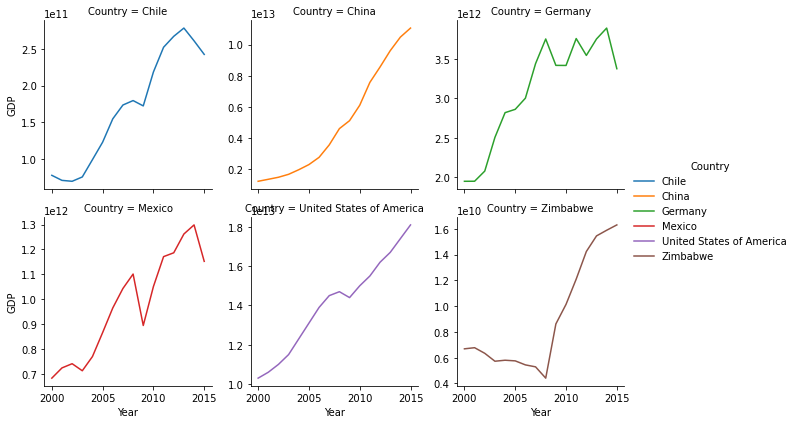

In [ ]:
data.graph_for_each("GDP")
# Overall, each coutry has steady growth on GDP from time to time
# We cnould not see the growth on the above graph when we compare GDP for all 6 coutries,
# but here, Chile and Zimbabwe even have the steep growth.
# Chile and Mexico have the dip around 2010. Maybe, Depression caused it? or something else?
# Germany GDP from 2008 to 2015 also requires further inspection.
# These three countries(Mexico, Germnay, Chile) also have the dip in 2015

Now, focus on Life Expectancy

Line Chart to analyze the change of life expectancy over years gruped by coutry

Bar cahrt to analyze the mean of life expectancy grouped by coutry

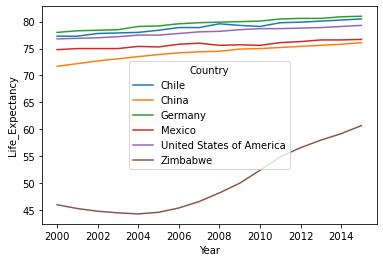

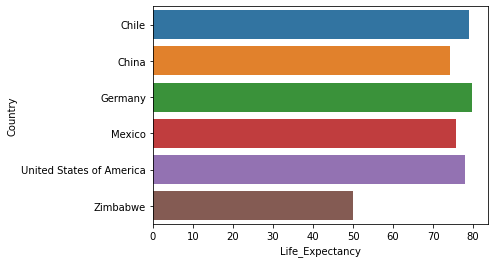

<Figure size 432x288 with 0 Axes>

In [ ]:
data.graph_for_all("Life_Expectancy")#
# From line chart
# From 2000-2015, Zimbabwe has the hugest growth after the big dip around 2004
# Other coutries have steady increase
# From bar chart
# All coutries, except Zimbabwe, have relatively close mean values.
# This value on Zimbabwe possibly creates the skew in the distribution chart
# because of the huge difference from others

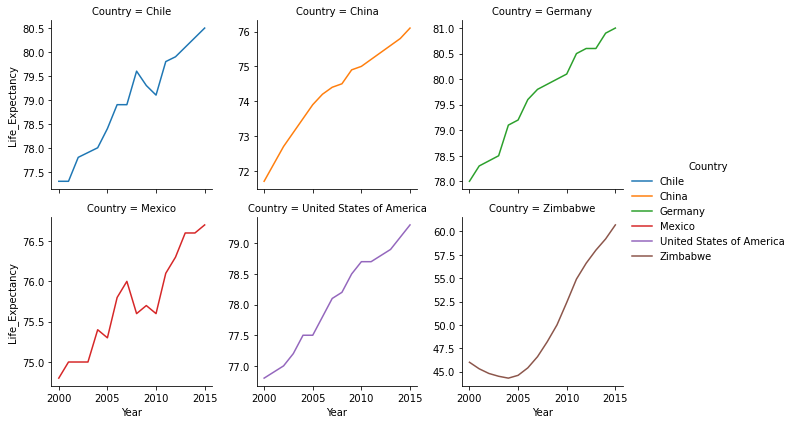

In [ ]:
data.graph_for_each("Life_Expectancy")
# Chile and Mexico have the dip around 2010, which is around the same timw when they
# had the dip on GDP
# China, America, and Germany have the stable growth on life expectancy as well as GDP
# Zimbabwe has almost 15 years of increase in life expectancy, while others have
# 2-3 years of increase.

Now, Let's take a look at distribution chart

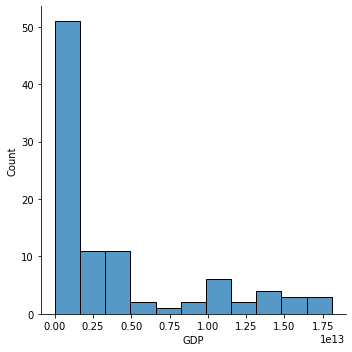

<Figure size 432x288 with 0 Axes>

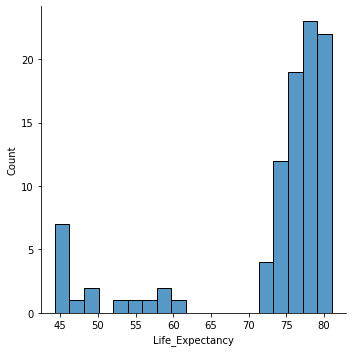

<Figure size 432x288 with 0 Axes>

In [ ]:
data.distribution_chart("GDP")
data.distribution_chart("Life_Expectancy")
# GDP distribution chart
# This is left-skewed. The reason will be that 5 coutries have much lower GDP
# compared to America. China has even almost the half GDP of America.#
# Life Expectancy distribution chart
# This is right_skewed. The left side outliers are because of Zimbabwe.

In [ ]:
from scipy.stats import pearsonr

correlation, _=pearsonr(x=df.GDP, y=df.Life_Expectancy)
print(correlation)

# it has positive correlation, which means they both have positive inclination of linear slope.

0.34320674844915594


## Conslusion

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.